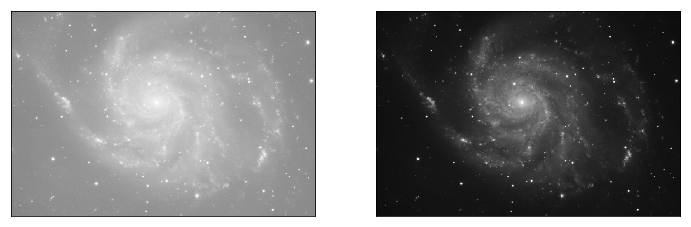

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#pregunta1
def gamma_correction(image,gamma):
    c = 1/(255**(gamma-1))
    newImage = c * (np.double(image)**gamma)
    return newImage
    


im = cv2.imread('Galaxia.jpg')
gamma = 4.5

new_image = gamma_correction(im,gamma)
new_image = np.uint8(new_image)

plt.figure(figsize=(12,18))
plt.subplot(1,2,1),plt.imshow(im, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(new_image, cmap='gray')
plt.xticks([]),plt.yticks([])

plt.show()


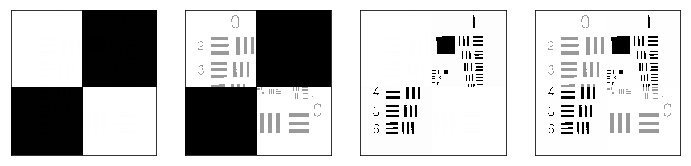

In [3]:
#pregunta 2
def gamma_correction(image,gamma):
    c = 1/(255**(gamma-1))
    newImage = c * (np.double(image)**gamma)
    return newImage
    


im = cv2.imread('incognita1.tif',0)
gamma = 128

new_image = gamma_correction(im,gamma)
new_image = np.uint8(new_image)

gamma2 = 0.001
new_image2 = gamma_correction(im,gamma2)
new_image2 = np.uint8(new_image2)

final = new_image2 + new_image

plt.figure(figsize=(12,18))
plt.subplot(1,4,1),plt.imshow(im, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(1,4,2),plt.imshow(new_image, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(1,4,3),plt.imshow(new_image2, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(1,4,4),plt.imshow(final, cmap='gray')
plt.xticks([]),plt.yticks([])

plt.show()



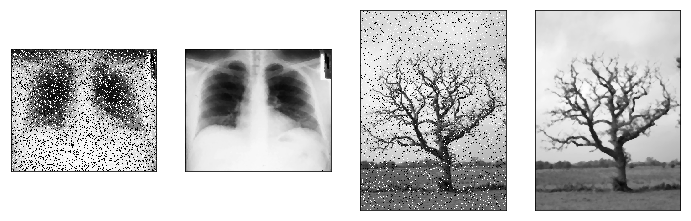

In [4]:
#pregunta 3


def filtrado(imagen,mascara):
    
    new_image = np.zeros((imagen.shape[0] + mascara.shape[0] - 1,
                          imagen.shape[1] + mascara.shape[1] - 1), 
                         dtype = np.uint8)
    
    new_image2 = np.zeros((imagen.shape[0] + mascara.shape[0] - 1,
                          imagen.shape[1] + mascara.shape[1] - 1), 
                         dtype = np.uint8)
    
    new_image[mascara.shape[0]//2:-mascara.shape[0]//2+1,
              mascara.shape[1]//2:-mascara.shape[1]//2+1] = imagen
    
    mediana = (mascara.shape[0]*mascara.shape[1])//2
    
    for i in range (mascara.shape[0]//2, new_image.shape[0]-mascara.shape[0]//2):
        for j in range(mascara.shape[1]//2, new_image.shape[1]-mascara.shape[1]//2):
            vecindad = new_image[i-mascara.shape[0]//2:i+mascara.shape[0]//2+1,
                                 j-mascara.shape[1]//2:j+mascara.shape[1]//2+1]
            new_image2[i,j] = np.sum(vecindad*mascara)
            
            B = np.asarray(vecindad).reshape(-1)
            new_image2[i,j] = sorted(B)[mediana]
            
    return new_image2[mascara.shape[0]//2:-mascara.shape[0]//2+1,
                      mascara.shape[1]//2:-mascara.shape[1]//2+1] 


mask_prom = (1/25)*np.ones((5,5))

im = cv2.imread('Radiografia.jpg',0)
im2 = cv2.imread('Arbol.jpg',0)

new_image = filtrado(im,mask_prom)
new_image2 = filtrado(im2,mask_prom)
    
plt.figure(figsize=(12,18))
plt.subplot(1,4,1),plt.imshow(im, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(1,4,2),plt.imshow(new_image, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(1,4,3),plt.imshow(im2, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(1,4,4),plt.imshow(new_image2, cmap='gray')
plt.xticks([]),plt.yticks([])

plt.show()


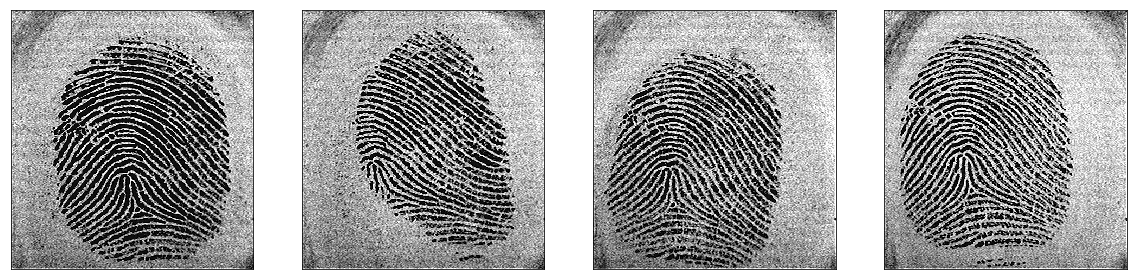

In [5]:
#pregunta 4

#filtro de realce
#sin restricciones

def filtrado2(imagen,mascara):
    #zero-padding
    new_image = np.zeros((imagen.shape[0] + mascara.shape[0] - 1,
                          imagen.shape[1] + mascara.shape[1] - 1), 
                         dtype = np.uint8)
    
    new_image2 = np.zeros((imagen.shape[0] + mascara.shape[0] - 1,
                          imagen.shape[1] + mascara.shape[1] - 1), 
                         dtype = np.int)
    
    new_image[mascara.shape[0]//2:-mascara.shape[0]//2+1,
              mascara.shape[1]//2:-mascara.shape[1]//2+1] = imagen
    
    for i in range (mascara.shape[0]//2, new_image.shape[0]-mascara.shape[0]//2):
        for j in range(mascara.shape[1]//2, new_image.shape[1]-mascara.shape[1]//2):
            vecindad = new_image[i-mascara.shape[0]//2:i+mascara.shape[0]//2+1,
                                 j-mascara.shape[1]//2:j+mascara.shape[1]//2+1]
            new_image2[i,j] = np.sum(vecindad*mascara)
            
    return new_image2[mascara.shape[0]//2:-mascara.shape[0]//2+1,
                      mascara.shape[1]//2:-mascara.shape[1]//2+1]


im = cv2.imread('huella_1.jpg',0)
im2 = cv2.imread('huella_2.jpg',0)
im3 = cv2.imread('huella_3.jpg',0)
im4 = cv2.imread('huella_4.jpg',0)

mask_laplacian = np.array([[0,1,0],[1,-4,1],[0,1,0]])


laplacian = filtrado2(im,mask_laplacian)
new_im = im - laplacian

laplacian2 = filtrado2(im2,mask_laplacian)
new_im2 = im2 - laplacian2

laplacian3 = filtrado2(im3,mask_laplacian)
new_im3 = im3 - laplacian3

laplacian4 = filtrado2(im4,mask_laplacian)
new_im4 = im4 - laplacian4



np.clip(new_im, 0, 255, out=new_im)
new_im=new_im.astype('uint8')

np.clip(new_im2, 0, 255, out=new_im2)
new_im2=new_im2.astype('uint8')

np.clip(new_im3, 0, 255, out=new_im3)
new_im3=new_im3.astype('uint8')

np.clip(new_im4, 0, 255, out=new_im4)
new_im4=new_im4.astype('uint8')


    
plt.figure(figsize=(20,20))
plt.subplot(1,4,1),plt.imshow(new_im, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(1,4,2),plt.imshow(new_im2, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(1,4,3),plt.imshow(new_im3, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(1,4,4),plt.imshow(new_im4, cmap='gray')
plt.xticks([]),plt.yticks([])



plt.show()


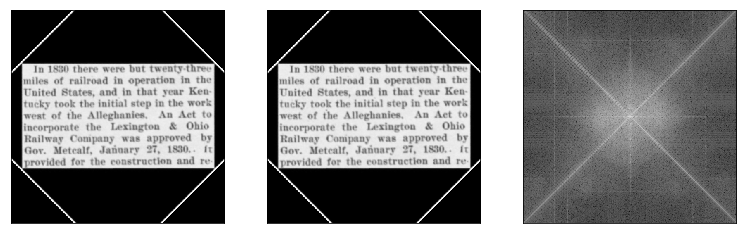

In [245]:
#pregunta 5 transformada

img = cv2.imread('Texto.jpg', 0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),315,1)
dst = cv2.warpAffine(img,M,(cols,rows))

F = np.fft.fft2(dst) 
F2 = np.fft.ifft2(F) 
img2 = np.abs(F2)

IF = np.fft.fftshift(F)
magnitud = 20*np.log(np.abs(IF)) 



plt.figure(figsize=(13,13))
plt.subplot(1,3,1),plt.imshow(dst, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img2, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3),plt.imshow(magnitud, cmap='gray')
plt.xticks([]),plt.yticks([])

plt.show()



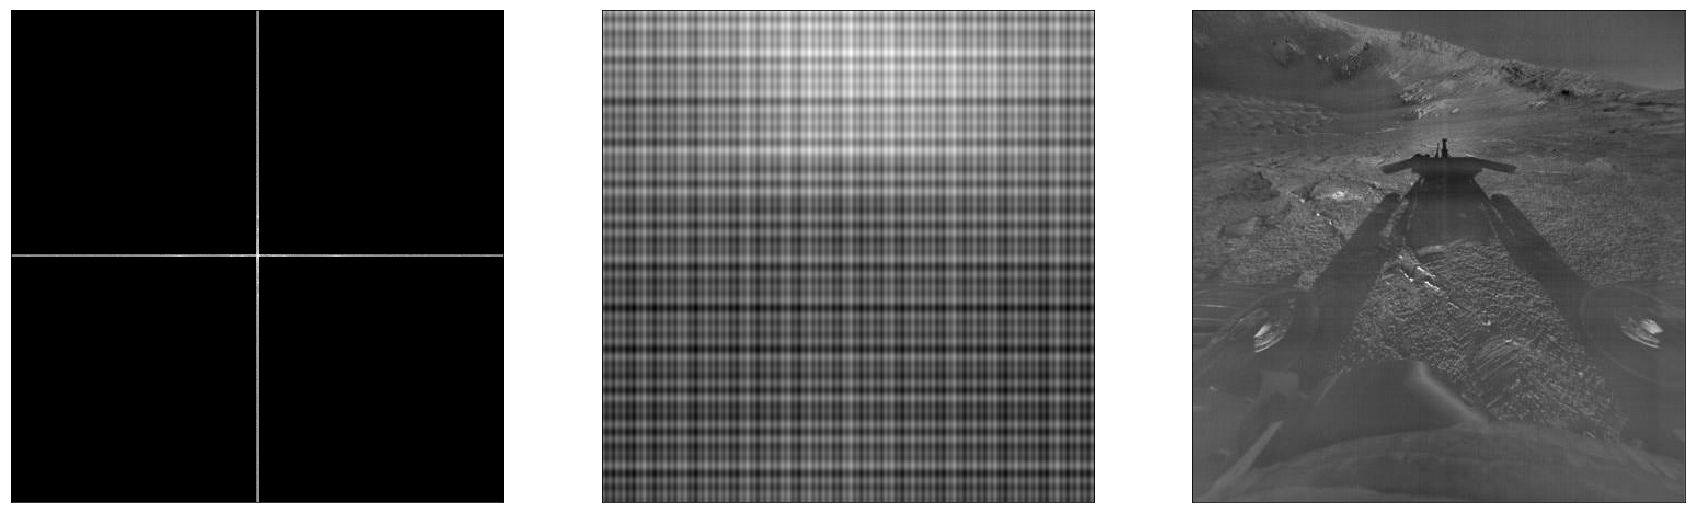

In [244]:
#pregunta 6


img = cv2.imread('MarteC.jpeg', 0)
F = np.fft.fft2(img) 
F2 = np.fft.ifft2(F) 
img2 = np.abs(F2)
IF = np.fft.fftshift(F)


rows, cols = img.shape
crow, ccol= int(rows/2), int(cols/2)

mask = np.zeros((rows, cols), np.uint8)

#mask[0:500,225:227] = 1
#mask[225:227,0:500] = 1

mask[0:rows,ccol-1:ccol+1]=1
mask[crow-1:crow+1,0:cols]=1


IF = IF * (mask)
mag = 20*np.log(1 + np.abs(IF)) 
FI = np.fft.ifftshift(IF)
FI = np.fft.ifft2(FI)
FI = np.abs(FI)

FII = img - FI

plt.figure(figsize=(30,30))
plt.subplot(1,3,1),plt.imshow(mag, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2),plt.imshow(FI, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3),plt.imshow(FII, cmap='gray')
plt.xticks([]),plt.yticks([])

plt.show()